<a href="https://colab.research.google.com/github/sebastiant93/Reto_Visualizacion_Analisis_Descriptivo/blob/main/Reto_Visualizaci%C3%B3n_An%C3%A1lisis_Descriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto Visualización Análisis descriptivo - Autotransporte Federal de Turismo**

**Presentado por: Sebastián Torres Franco**

#Importación de librerías

In [166]:
#*********************************Importación de liberarías para desarrollo de ejercicio
#*************Bibliotecas numéricas
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from sklearn import linear_model

#*********Bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import lmplot
from mpl_toolkits.mplot3d import Axes3D

#*********Otras bibliotecas
import warnings #Desactivar mensajes de advertencia en las impresiones
warnings.filterwarnings("ignore")

#3) Gráfica de bigotes

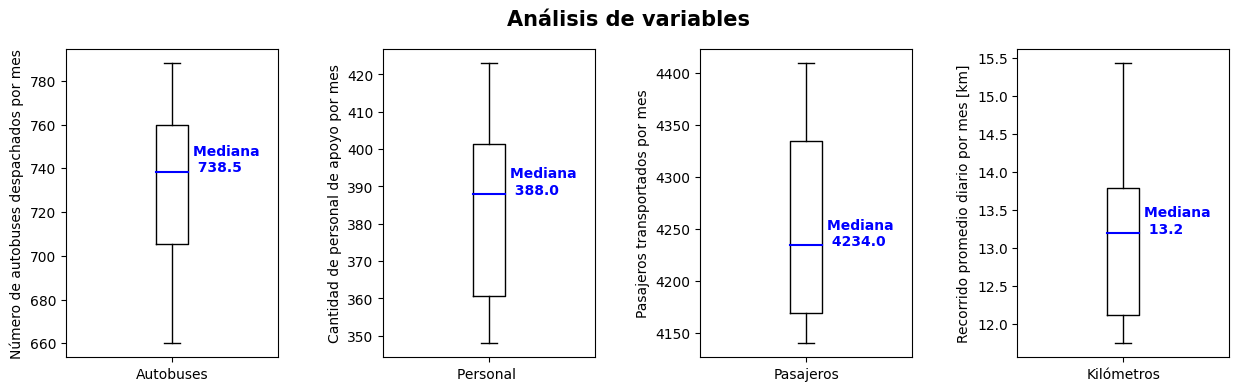

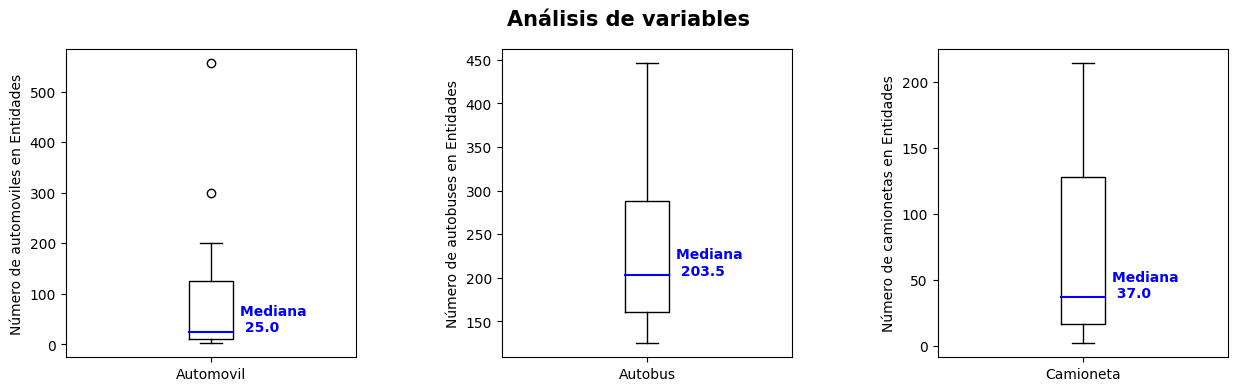

In [3]:
#*****************************************Declaración de funciones para grafica de bigotes
def graph_box(dataFrame,ylabels):
#Descripción:
    #Función encargada de tomar la información de un DataFrame, y realizar una gráfica de Bigotes sobre las variables indicadas en las columnas del DataFrame
#Argumentos & Variables:
    #dataFrame: DataFrame con variables a graficar
    #ylabels: Lista con el nombre de las variables a usar en los ticks de cada boxplot.

    n_var=dataFrame.columns.shape[0] #Se determina el número de variables a graficar

    #Se definen diccionarios de customización para la mediana de los boxplot
    median_dict={"color":"b","linewidth":1.5}
    font_dict={"color":"b","weight":"bold","size":10}

    #Se define un subplot de 1xn_var (Rejilla Horizontal de datos)
    gprah_box,axs=plt.subplots(1,n_var,figsize=(15,4))
    plt.subplots_adjust(wspace=0.5)
    plt.suptitle("Análisis de variables",fontweight="bold",fontsize=15); #Título principal del gráfico

    for i in range(n_var): #Se grafica la rejilla, personalizando la mediana de cada boxplot
        data=dataFrame.iloc[:,i] #Se toman los datos de la variable
        mediana=dataFrame.iloc[:,i].median().round(2) #Se calcula su respectiva mediana
        axs[i].boxplot(x=data,medianprops=median_dict) #se grafica el boxplot en la rejilla
        axs[i].set_xticks([1],[dataFrame.columns[i]]) #Se customizan los xticks de cada boxplot, dejando el nombre de la variable
        axs[i].set_ylabel(ylabels[i]) #Se imprime la interpretación de los datos
        axs[i].text(1.1,np.median(data),f"Mediana \n {mediana}",fontdict=font_dict) #texto anotativo de la mediana.
    return
#**********************************************************************************************

#************************************* Main ***************************************************

#Para archivo 1
dF_arch1=pd.read_csv("reto_1.csv",index_col="Meses") #Lectura del archivo
ylabels_1=["Número de autobuses despachados por mes",
           "Cantidad de personal de apoyo por mes",
           "Pasajeros transportados por mes",
           "Recorrido promedio diario por mes [km]"] #Lista de labels explicatorios que son usados en la función graph_box
graph_box(dF_arch1,ylabels_1)

#Para archivo 3
dF_arch3=pd.read_csv("reto_3.csv",usecols=["Entidad","Automovil","Autobus","Camioneta"]) #Lectura del archivo
dF_arch3.set_index("Entidad",inplace=True)#Se usa la columna clase como índice
ylabels_3=["Número de automoviles en Entidades",
           "Número de autobuses en Entidades",
           "Número de camionetas en Entidades"] #Lista de labels explicatorios que son usados en la función graph_box
graph_box(dF_arch3,ylabels_3)




#4) Gráfica de tres dimensiones

Se realiza la gráfica únicamente sobre los datos contenidos en el adjunto "reto_1", donde la variable kilómetros puede responder a alguna de las otras tres variables del archivo ("Autobuses", "Personal","Pasajeros")


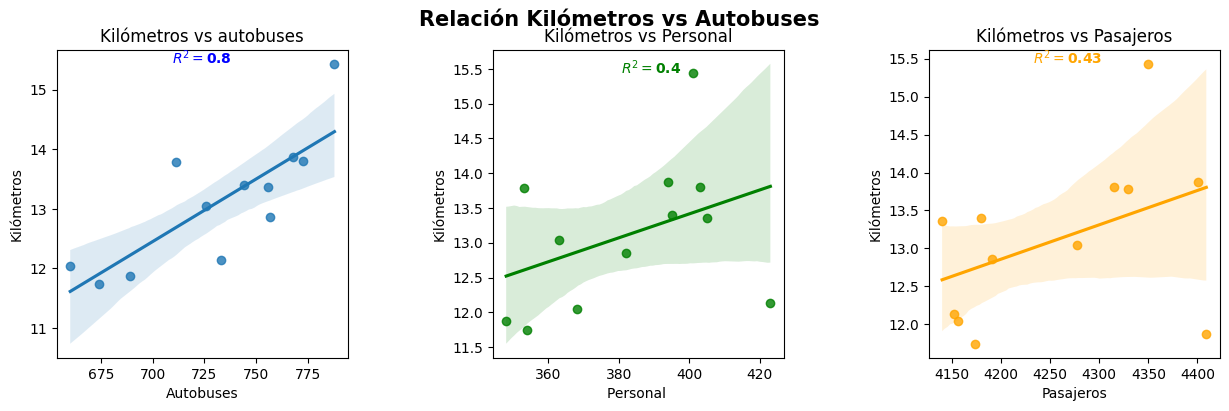

In [31]:
#Se realiza una matriz de dispersión para determinar las variables que tienen relación con los kilómetros

rel_vars,axs=plt.subplots(1,3,figsize=(15,4)) #Se crea el subplot de 1x3 para el análisis de las dispersiones
plt.subplots_adjust(wspace=0.5,hspace=10) #Se ajusta el aspecto de las figuras
plt.suptitle("Relación Kilómetros vs Autobuses",fontweight="bold",fontsize=15); #Título principal del gráfico

#*****************Gráfico de dispersión del kilómetros vs autobuses
sns.regplot(data=dF_arch1,x="Autobuses",y="Kilómetros",ax=axs[0]);
axs[0].set_title("Kilómetros vs autobuses");
dF_arch1
axs[0].text(dF_arch1["Autobuses"].max()*.9,dF_arch1["Kilómetros"].max(),"$R^2=$"+str(dF_arch1.corr().loc["Kilómetros","Autobuses"].round(2)),fontdict={"color":"blue","weight":"bold"}); #Impresión de R^2 sobre la gráfica

#*****************Gráfico de dispersión del kilómetros vs Personal
sns.regplot(data=dF_arch1,x="Personal ",y="Kilómetros",ax=axs[1],color="green");
axs[1].set_title("Kilómetros vs Personal");
axs[1].text(dF_arch1["Personal "].max()*.9,dF_arch1["Kilómetros"].max(),"$R^2=$"+str(dF_arch1.corr().loc["Kilómetros","Personal "].round(2)),fontdict={"color":"green","weight":"bold"}); #Impresión de R^2 sobre la gráfica

#*****************Gráfico de dispersión del kilómetros vs Pasajeros
sns.regplot(data=dF_arch1,x="Pasajeros",y="Kilómetros",ax=axs[2],color="orange");
axs[2].set_title("Kilómetros vs Pasajeros");
axs[2].text(dF_arch1["Pasajeros"].max()*0.96,dF_arch1["Kilómetros"].max(),"$R^2=$"+str(dF_arch1.corr().loc["Kilómetros","Pasajeros"].round(2)),fontdict={"color":"orange","weight":"bold"}); #Impresión de R^2 sobre la gráfica


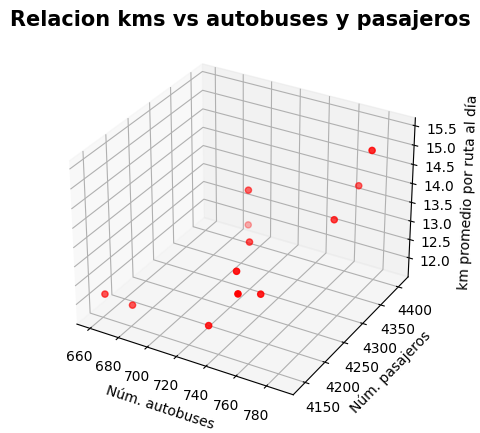

In [5]:
#A partir de los resultados se evidencia que la relación más fuerte de los kilómetros se tiene con el nímero de autobuses, y con el número de pasajeros.
#Se usan esatas dos variables para elaborar el gráfico 3D
figure3D=plt.figure(figsize=(8,5)) #Se crea la figura
ax=figure3D.add_subplot(111,projection="3d") #Se crea la proyección 3D

#Se toman los datos seleccionados del análisis de correlación
X= dF_arch1["Autobuses"]
Y= dF_arch1["Pasajeros"]
Z= dF_arch1["Kilómetros"]

#Gráfico 3D con algunas personalizaciones

ax.scatter(X,Y,Z,c="red")
plt.title("Relacion kms vs autobuses y pasajeros",fontsize=15,fontweight="bold");
ax.set_xlabel("Núm. autobuses");
ax.set_ylabel("Núm. pasajeros");
ax.set_zlabel("km promedio por ruta al día");


#3) Gráfico de residuales

Text(0, 0.5, 'Error Residual')

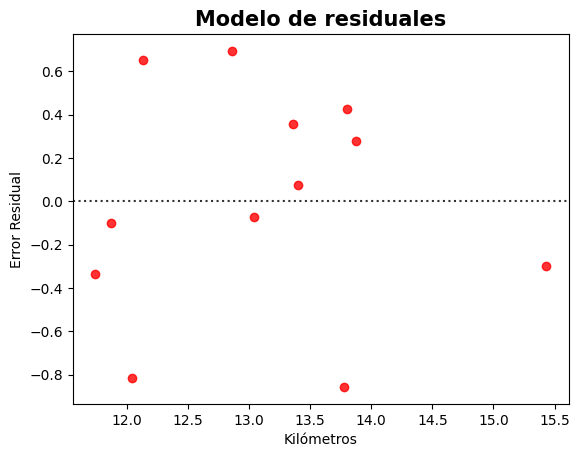

In [6]:
#Para el gráfico de residuales realizamos una regresión lineal simple con el número de autobuses, dado que fue la única que mostró una correlación considerable
reg_model=linear_model.LinearRegression() #Se almacena el objeto de sklearn para modelos lineales

#Se almacenan los datos del ajuste en las variables X y Y
X=dF_arch1[["Autobuses"]]
Y=dF_arch1["Kilómetros"]

#Se realiza el ajuste lineal
reg_model.fit(X,Y)

#Se realiza la predicción sobre las variables de independientes
y_pred=reg_model.predict(X)

#Se realiza el gráfico de residuales
ax=resid_plot=sns.residplot(x=Y,y=y_pred-Y,color="r") #Se grafica un
plt.title("Modelo de residuales",fontsize=15,fontweight="bold")
plt.ylabel("Error Residual")

#6) Recta de ajuste

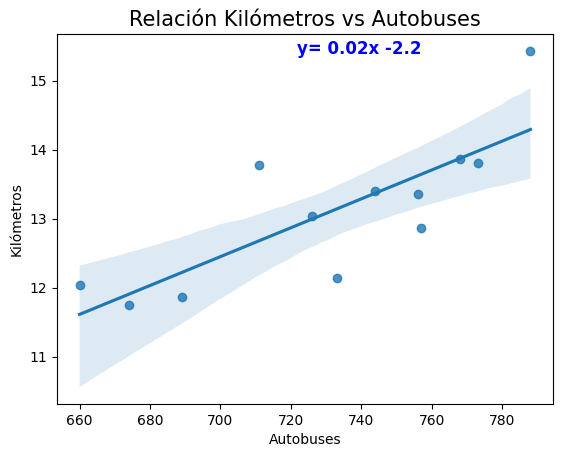

In [7]:
#Se grafica la recta de ajuste correspondiente a kilómetros vs número de autobuses dado que fue la única variable que mostró una correlación significativa
#Se usa el modelo de regresión del punto 5 para la ecuación de la recta

#Por alguna razón no me estaba imprimiento la ecuación de la recta :(
#ax=sns.regplot(data=dF_arch1,x="Autobuses",y="Kilómetros",line_kws={'label':f"y={reg_model.coef_[0].round(2)}x+{reg_model.intercept_.round(2)}"}) #Por alguna razón no me estaba imprimiento la ecuación de la recta :(

figure=plt.figure() #Se crea la figura para la personalización de la ecuación de ajuste
ax=sns.regplot(data=dF_arch1,x="Autobuses",y="Kilómetros");
plt.text(0.5,0.84,f"y= {reg_model.coef_[0].round(2)}x {reg_model.intercept_.round(2)}",transform=figure.transFigure,fontdict={"color":"blue","size":12,"weight":"bold"});
plt.title("Relación Kilómetros vs Autobuses",fontsize=15);

#7) kdeplot

Text(0, 0.5, 'Función de probabilidad de densidad')

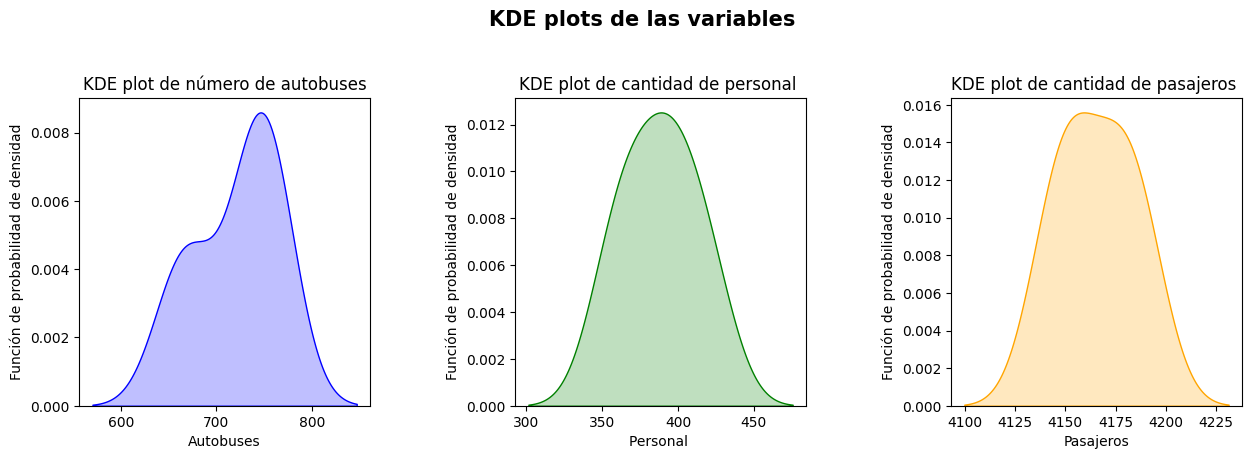

In [22]:
#Por requisito de la rúbrica se filtra la informacion de los primeros seis meses
dF_6months=dF_arch1.iloc[0:6,:]

#Se crea la figura para ubicar cada kdeplot en un subplot
fig=plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace=0.5)
plt.suptitle("KDE plots de las variables",fontweight="bold",fontsize=15,y=1.1); #Título principal de la figura

#***************kdeplot del número de autobuses
kde_autobuses=fig.add_subplot(1,3,1)
sns.kdeplot(data=dF_6months["Autobuses"], fill="True",color="blue")
kde_autobuses.set_title("KDE plot de número de autobuses")
kde_autobuses.set_ylabel("Función de probabilidad de densidad")

#***************kdeplot del número de Personal
kde_Personal=fig.add_subplot(1,3,2)
sns.kdeplot(data=dF_6months["Personal "], fill="True",color="green")
kde_Personal.set_title("KDE plot de cantidad de personal ")
kde_Personal.set_ylabel("Función de probabilidad de densidad")

#***************kdeplot del número de Pasajeros
kde_Pasajeros=fig.add_subplot(1,3,3)
sns.kdeplot(data=dF_6months["Pasajeros"], fill="True",color="orange")
kde_Pasajeros.set_title("KDE plot de cantidad de pasajeros ")
kde_Pasajeros.set_ylabel("Función de probabilidad de densidad")



#8) Gráfico de barras

Se consideran 6 meses, de acuerdo con lo solicitado en la rúbrica del reto

Text(0, 0.5, 'Cantidad de pasajeros')

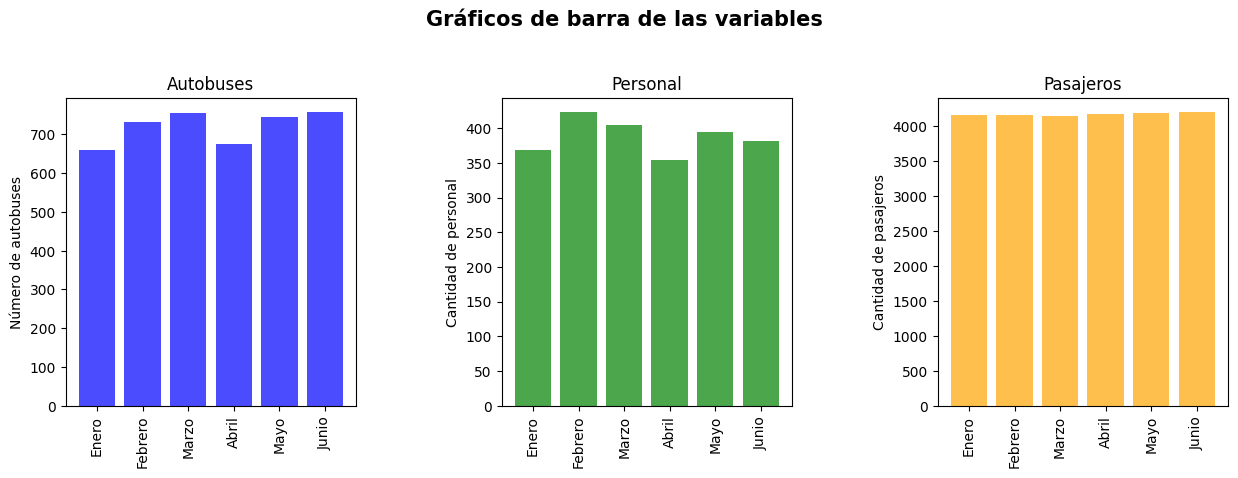

In [167]:
#Se realiza el gráfico de barras de los primeros 6 meses de cada variabe, siguiendo el requisito de la rúbrica.
fig,axs=plt.subplots(1,3,figsize=(15,4))
plt.subplots_adjust(wspace=0.5)
plt.suptitle("Gráficos de barra de las variables ",fontweight="bold",fontsize=15,y=1.1); #Título principal de la figura

#***************Barras del número de Autobuses
axs[0].bar(dF_6months.index,dF_6months["Autobuses"],color="blue",alpha=0.7);
axs[0].set_title("Autobuses");
axs[0].set_xticklabels(labels=dF_6months.index,rotation=90);
axs[0].set_ylabel("Número de autobuses")

#***************Barras del número de Personal
axs[1].bar(dF_6months.index,dF_6months["Personal "],color="green",alpha=0.7);
axs[1].set_title("Personal");
axs[1].set_xticklabels(labels=dF_6months.index,rotation=90);
axs[1].set_ylabel("Cantidad de personal")

#***************Barras del número de Pasajeros
axs[2].bar(dF_6months.index,dF_6months["Pasajeros"],color="orange",alpha=0.7);
axs[2].set_title("Pasajeros");
axs[2].set_xticklabels(labels=dF_6months.index,rotation=90);
axs[2].set_ylabel("Cantidad de pasajeros")

#9) Gráfico por regiones

Teniendo en cuenta el requisito de la rúbrica, se usa la información del archivo "reto_3".

Debido a que para algunos tipos de vehículos el porcentaje de algunos estados es inferiror al 1%, (ejemplo automóviles en Campeche), decidí agrupar las muestras en la categoría "otros estados" para mantener legible las gráficas.

Text(0.5, 1.0, 'Camionetas')

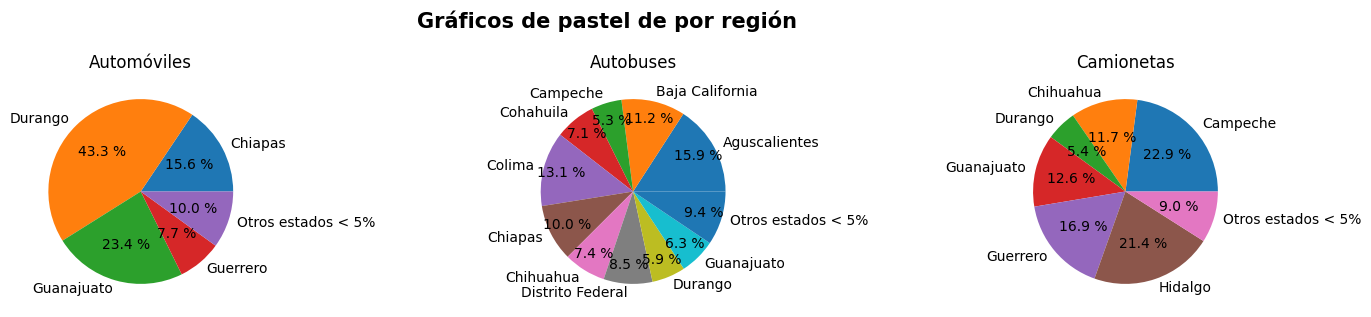

In [179]:
#Se define función para agrupar estados con participación menor al 5%

#********************************************************************************************
def group_states(dataFrame):
#Descripción:
    #Función encargada de agrupar para cada variable los estados con participación menor al 5%
#Argumentos & VariableS:
    #dataFrame: DataFrame con la variable a agrupar
#Salidas:
    #grouped_states: Dataframe de los estados de acuerdo con la agrupación resultante

    dataFrame["Porcentaje"]=dataFrame/dataFrame.sum() #Se calcula el porcentaje de cada estado
    grouped_states=dataFrame.loc[dataFrame["Porcentaje"]>0.05,:] #Se almacenan los estados que tienen porcentajes mayores a 5%
    grouped_states.drop(["Porcentaje"],inplace=True,axis=1) # Nos deshacemos de la columna de porcentaje, y mantenemos estructura de DataFrame
    other_states=pd.DataFrame({dataFrame.columns[0]:dataFrame.loc[dataFrame["Porcentaje"]<0.05,:].sum()[0]},index=["Otros estados < 5%"]) #Dataframe con otros estados con < 5%
    grouped_states=pd.concat([grouped_states,other_states],axis=0) #Se concatena el dataframe final

    return grouped_states
#********************************************************************************************

#Se realiza el gráfico de barras de los primeros 6 meses de cada variabe, siguiendo el requisito de la rúbrica.
fig,axs=plt.subplots(1,3,figsize=(18,3))
plt.subplots_adjust(wspace=0.2)
plt.suptitle("Gráficos de pastel de por región ",fontweight="bold",fontsize=15,y=1.1); #Título principal de la figura

#***************Barras del número de automóviles por estado
data_Automovil=group_states(dF_arch3[["Automovil"]]) #Se toma el dataframe agrupando estados con la función group_states
axs[0].pie(x=data_Automovil["Automovil"],autopct="%0.1f %%",labels=data_Automovil.index);
axs[0].set_title("Automóviles")

#***************Barras del número de Autobuses por estado
data_Autobuses=group_states(dF_arch3[["Autobus"]]) #Se toma el dataframe agrupando estados con la función group_states
axs[1].pie(x=data_Autobuses["Autobus"],autopct="%0.1f %%",labels=data_Autobuses.index,pctdistance=0.8);
axs[1].set_title("Autobuses")

#***************Barras del número de camionetas por estado
data_Camioneta=group_states(dF_arch3[["Camioneta"]]) #Se toma el dataframe agrupando estados con la función group_states
axs[2].pie(x=data_Camioneta["Camioneta"],autopct="%0.1f %%",labels=data_Camioneta.index);
axs[2].set_title("Camionetas")

#10) Gráfica de dispersión.

Se realiza la gráfica únicamente sobre los datos contenidos en el adjunto "reto_1", donde la variable kilómetros puede responder a alguna de las otras tres variables del archivo ("Autobuses", "Personal","Pasajeros")

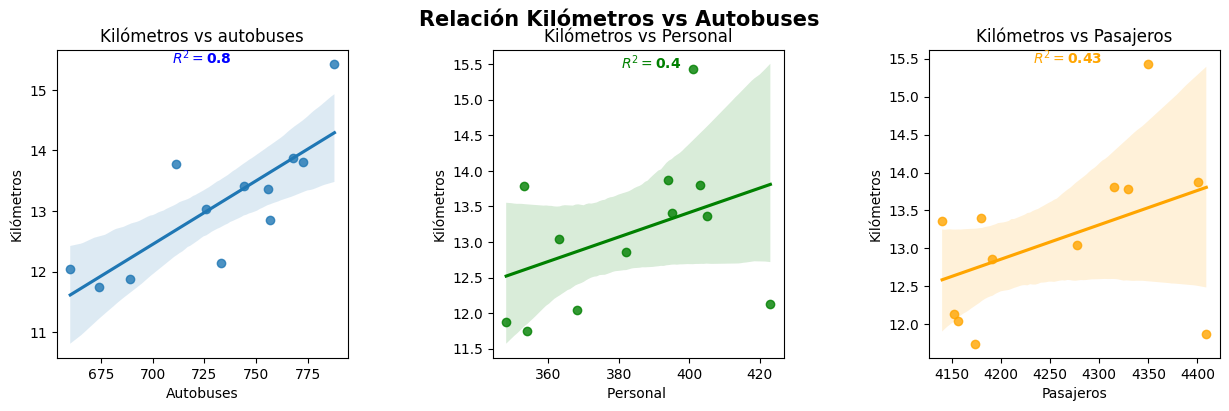

In [117]:
#Se realiza una matriz de dispersión para determinar las variables que tienen relación con los kilómetros

rel_vars,axs=plt.subplots(1,3,figsize=(15,4)) #Se crea el subplot de 1x3 para el análisis de las dispersiones
plt.subplots_adjust(wspace=0.5,hspace=10) #Se ajusta el aspecto de las figuras
plt.suptitle("Relación Kilómetros vs Autobuses",fontweight="bold",fontsize=15); #Título principal del gráfico

#*****************Gráfico de dispersión del kilómetros vs autobuses
sns.regplot(data=dF_arch1,x="Autobuses",y="Kilómetros",ax=axs[0]);
axs[0].set_title("Kilómetros vs autobuses");
dF_arch1
axs[0].text(dF_arch1["Autobuses"].max()*.9,dF_arch1["Kilómetros"].max(),"$R^2=$"+str(dF_arch1.corr().loc["Kilómetros","Autobuses"].round(2)),fontdict={"color":"blue","weight":"bold"}); #Impresión de R^2 sobre la gráfica

#*****************Gráfico de dispersión del kilómetros vs Personal
sns.regplot(data=dF_arch1,x="Personal ",y="Kilómetros",ax=axs[1],color="green");
axs[1].set_title("Kilómetros vs Personal");
axs[1].text(dF_arch1["Personal "].max()*.9,dF_arch1["Kilómetros"].max(),"$R^2=$"+str(dF_arch1.corr().loc["Kilómetros","Personal "].round(2)),fontdict={"color":"green","weight":"bold"}); #Impresión de R^2 sobre la gráfica

#*****************Gráfico de dispersión del kilómetros vs Pasajeros
sns.regplot(data=dF_arch1,x="Pasajeros",y="Kilómetros",ax=axs[2],color="orange");
axs[2].set_title("Kilómetros vs Pasajeros");
axs[2].text(dF_arch1["Pasajeros"].max()*0.96,dF_arch1["Kilómetros"].max(),"$R^2=$"+str(dF_arch1.corr().loc["Kilómetros","Pasajeros"].round(2)),fontdict={"color":"orange","weight":"bold"}); #Impresión de R^2 sobre la gráfica
